In [1]:
from modified_mcts import *

f = qnet.QNet()

f.load_state_dict(torch.load('./param.pth')['model_state_dict'])


<All keys matched successfully>

In [24]:
def test(times=20,iter=50):

    test_times= range(times)
    test_iter = range(iter)
    test_env = env.BlackJackEnv()
    test_env.reset_env()
    test_env.new_round()

    earned =[0]*times
    for t in test_times:
        for _ in test_iter:
            done = False
            while not done:
                inp = test_env.state.input()
                p,v = f(torch.FloatTensor([inp]))
                action = torch.argmax(p[0]).item()
                #print(inp,action.item())
                reward,done = test_env.step(action)
            if done:
                earned[t]+=reward*iter

    print(f'final avg earned: {sum(earned)/times}')
    return earned

In [25]:
earned =test(100,50)

final avg earned: -305.0


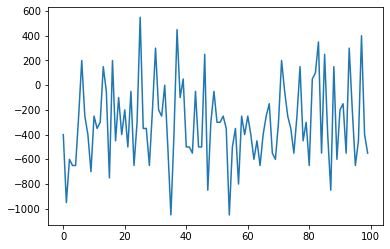

In [26]:
plt.plot(earned)

In [11]:
test_iter = range(200)
test_env = env.BlackJackEnv()
test_env.reset_env()
test_env.new_round()
earned =0
for _ in test_iter:
    done = False
    while not done:
        inp = test_env.state.input()
        p,v = f(torch.FloatTensor([inp]))
        action = torch.argmax(p[0]).item()
        #print(inp,action.item())
        reward,done = test_env.step(action)
        print(inp,action)
        print(p[0],v[0].item(),reward)
    if done:
        earned+=reward*50

earned

[24, 24, 23, 23, 24, 24, 24, 24, 24, 24, 24, 23, 24, 10, 7, 7] 0
tensor([0.6028, 0.1890, 0.2082], grad_fn=<SelectBackward>) -0.3483506739139557 None
[24, 24, 23, 23, 24, 24, 24, 24, 24, 24, 24, 23, 23, 10, 17, 17] 0
tensor([0.6889, 0.1070, 0.2040], grad_fn=<SelectBackward>) -0.6017412543296814 -1
[22, 24, 23, 23, 24, 24, 23, 23, 24, 24, 24, 23, 22, 8, 2, 12] 0
tensor([0.5920, 0.1081, 0.2999], grad_fn=<SelectBackward>) -0.41864094138145447 None
[21, 24, 23, 23, 24, 24, 23, 23, 24, 24, 24, 23, 22, 8, 3, 13] 0
tensor([0.6134, 0.1915, 0.1951], grad_fn=<SelectBackward>) -0.3836888372898102 None
[21, 24, 23, 23, 24, 24, 22, 23, 24, 24, 24, 23, 22, 8, 10, 20] 2
tensor([0.2920, 0.3084, 0.3995], grad_fn=<SelectBackward>) 0.135915607213974 1
[21, 24, 23, 22, 24, 24, 21, 23, 24, 24, 23, 22, 21, 7, 20, 20] 2
tensor([6.2015e-03, 1.8015e-07, 9.9380e-01], grad_fn=<SelectBackward>) 0.7102733850479126 1
[19, 24, 23, 22, 24, 24, 21, 23, 23, 24, 23, 21, 21, 9, 11, 21] 2
tensor([0.2846, 0.2131, 0.5023], g

[2, 9, 6, 6, 9, 6, 5, 7, 9, 13, 9, 6, 4, 10, 20, 20] 2
tensor([0.2246, 0.0065, 0.7689], grad_fn=<SelectBackward>) 0.2517070472240448 1
[2, 9, 5, 6, 9, 5, 5, 7, 8, 13, 8, 5, 4, 10, 13, 13] 2
tensor([0.3737, 0.0433, 0.5830], grad_fn=<SelectBackward>) -0.3793449401855469 -1
[1, 9, 5, 5, 9, 5, 5, 6, 8, 12, 8, 5, 4, 8, 5, 15] 0
tensor([0.6027, 0.0913, 0.3060], grad_fn=<SelectBackward>) -0.4951372742652893 None
[1, 9, 5, 5, 8, 5, 5, 6, 8, 12, 8, 5, 4, 8, 10, 20] 0
tensor([0.6320, 0.0776, 0.2904], grad_fn=<SelectBackward>) -0.5467203259468079 None
[1, 9, 5, 5, 8, 5, 5, 6, 8, 12, 7, 5, 4, 8, 20, 20] 2
tensor([9.7888e-02, 8.7242e-05, 9.0203e-01], grad_fn=<SelectBackward>) 0.3923836648464203 -1
[1, 8, 4, 4, 7, 5, 5, 6, 8, 12, 7, 4, 4, 4, 7, 7] 0
tensor([0.4996, 0.3112, 0.1893], grad_fn=<SelectBackward>) -0.10340314358472824 None
[1, 8, 4, 4, 7, 5, 5, 6, 8, 11, 7, 4, 4, 4, 17, 17] 2
tensor([0.2723, 0.0155, 0.7122], grad_fn=<SelectBackward>) 0.14677931368350983 -1
[1, 8, 4, 4, 7, 4, 5, 6, 6, 10, 7

[19, 12, 16, 16, 13, 13, 18, 10, 14, 16, 16, 12, 14, 9, 12, 12] 0
tensor([0.6399, 0.1196, 0.2405], grad_fn=<SelectBackward>) -0.7469854354858398 None
[19, 12, 16, 16, 13, 13, 18, 9, 14, 16, 16, 12, 14, 9, 20, 20] 2
tensor([0.2460, 0.0013, 0.7526], grad_fn=<SelectBackward>) 0.1414603590965271 1
[19, 12, 16, 15, 12, 12, 18, 8, 14, 16, 16, 12, 13, 10, 14, 14] 0
tensor([0.7393, 0.0909, 0.1698], grad_fn=<SelectBackward>) -0.5406001210212708 -1
[18, 12, 16, 15, 11, 12, 18, 8, 13, 14, 16, 12, 13, 10, 14, 14] 0
tensor([0.6200, 0.1476, 0.2324], grad_fn=<SelectBackward>) -0.2687221169471741 None
[18, 11, 16, 15, 11, 12, 18, 8, 13, 14, 16, 12, 13, 10, 16, 16] 0
tensor([0.6678, 0.1107, 0.2215], grad_fn=<SelectBackward>) -0.5241186618804932 None
[17, 11, 16, 15, 11, 12, 18, 8, 13, 14, 16, 12, 13, 10, 17, 17] 0
tensor([0.6311, 0.0523, 0.3166], grad_fn=<SelectBackward>) -0.5154026746749878 None
[17, 10, 16, 15, 11, 12, 18, 8, 13, 14, 16, 12, 13, 10, 19, 19] 2
tensor([0.3685, 0.0267, 0.6048], grad_fn=

[22, 22, 19, 22, 23, 20, 23, 23, 18, 24, 21, 20, 22, 10, 15, 15] 0
tensor([0.6631, 0.0979, 0.2390], grad_fn=<SelectBackward>) -0.7154768705368042 None
[22, 22, 19, 22, 23, 19, 23, 23, 18, 24, 21, 20, 22, 10, 21, 21] 2
tensor([4.3434e-03, 7.3645e-05, 9.9558e-01], grad_fn=<SelectBackward>) 0.6662781834602356 1
[22, 21, 19, 19, 23, 19, 23, 23, 18, 24, 20, 20, 22, 2, 8, 8] 0
tensor([0.6219, 0.2066, 0.1716], grad_fn=<SelectBackward>) -0.29638683795928955 None
[22, 21, 19, 19, 23, 19, 23, 23, 18, 24, 20, 19, 22, 2, 18, 18] 2
tensor([0.3998, 0.0206, 0.5797], grad_fn=<SelectBackward>) -0.26012730598449707 -1
[22, 21, 17, 18, 23, 19, 23, 23, 18, 24, 20, 18, 20, 3, 20, 20] 2
tensor([0.1365, 0.0051, 0.8584], grad_fn=<SelectBackward>) 0.4370678663253784 0
[22, 21, 17, 18, 22, 19, 23, 21, 17, 24, 19, 18, 20, 10, 13, 13] 0
tensor([0.7269, 0.0939, 0.1792], grad_fn=<SelectBackward>) -0.5761102437973022 -1
[22, 21, 17, 17, 22, 19, 23, 21, 16, 23, 19, 16, 20, 10, 20, 20] 2
tensor([0.2178, 0.0038, 0.7783

[7, 8, 7, 4, 9, 10, 8, 10, 7, 7, 7, 4, 4, 10, 15, 15] 0
tensor([0.7494, 0.1174, 0.1332], grad_fn=<SelectBackward>) -0.5560364723205566 None
[7, 8, 7, 3, 9, 10, 8, 10, 7, 7, 7, 4, 4, 10, 19, 19] 2
tensor([0.2136, 0.0020, 0.7844], grad_fn=<SelectBackward>) 0.23131689429283142 1
[7, 8, 5, 3, 9, 10, 8, 9, 7, 6, 7, 4, 4, 3, 13, 13] 0
tensor([0.6172, 0.1128, 0.2700], grad_fn=<SelectBackward>) -0.58206707239151 None
[7, 8, 5, 3, 9, 9, 8, 9, 7, 6, 7, 4, 4, 3, 19, 19] 2
tensor([0.3682, 0.0491, 0.5827], grad_fn=<SelectBackward>) -0.042548175901174545 -1
[6, 8, 5, 3, 8, 7, 8, 9, 7, 5, 7, 4, 4, 5, 16, 16] 2
tensor([0.4187, 0.0407, 0.5406], grad_fn=<SelectBackward>) -0.35714268684387207 -1
[6, 8, 5, 2, 8, 5, 8, 9, 7, 4, 7, 4, 3, 10, 14, 14] 0
tensor([0.7174, 0.1017, 0.1809], grad_fn=<SelectBackward>) -0.6144408583641052 -1
[6, 7, 5, 2, 8, 4, 8, 8, 7, 4, 5, 4, 3, 10, 10, 10] 0
tensor([0.5175, 0.1493, 0.3333], grad_fn=<SelectBackward>) -0.40829458832740784 None
[6, 7, 5, 2, 8, 4, 8, 8, 6, 4, 5, 4, 3,

[14, 16, 18, 18, 8, 19, 15, 17, 19, 14, 13, 15, 10, 10, 16, 16] 2
tensor([0.3688, 0.0101, 0.6211], grad_fn=<SelectBackward>) -0.26034408807754517 1
[14, 16, 18, 18, 7, 18, 15, 17, 19, 14, 13, 13, 9, 10, 16, 16] 2
tensor([0.3430, 0.0762, 0.5808], grad_fn=<SelectBackward>) -0.015185067430138588 -1
[13, 16, 18, 18, 7, 17, 15, 16, 19, 14, 13, 12, 9, 1, 14, 14] 0
tensor([0.4959, 0.0303, 0.4738], grad_fn=<SelectBackward>) -0.40722551941871643 None
[13, 16, 18, 17, 7, 17, 15, 16, 19, 14, 13, 12, 9, 1, 18, 18] 2
tensor([3.8866e-02, 2.0337e-05, 9.6111e-01], grad_fn=<SelectBackward>) 0.49744006991386414 -1
[13, 16, 18, 17, 7, 17, 13, 16, 17, 14, 13, 12, 9, 7, 16, 16] 2
tensor([0.2668, 0.0156, 0.7176], grad_fn=<SelectBackward>) -0.05502202734351158 1
[12, 16, 18, 17, 6, 17, 13, 15, 16, 14, 13, 11, 9, 5, 11, 21] 2
tensor([0.1584, 0.3740, 0.4676], grad_fn=<SelectBackward>) 0.4257667064666748 1
[12, 15, 17, 17, 6, 17, 12, 15, 16, 12, 13, 10, 9, 3, 20, 20] 2
tensor([0.1308, 0.0054, 0.8638], grad_fn=<

-650